In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import linear_model
from dateutil.parser import parse

In [22]:
data = pd.read_csv('CitibikeTripsWeathers_100000.csv')
bucket = 1
hrCount = data[['start_time']]
hrCount = np.array(hrCount).flatten()

In [23]:
hr1 = parse(min(hrCount))
array = [0 for i in range(20000)]

In [24]:
hour = hr1
for t in hrCount:
    t = parse(t)
    #print t
    time = t - hour
    diff = ((time.days*24) + (time.seconds)//3600) / bucket
    array[diff] += 1

In [25]:
def ewma_my(data, alpha, start):
    result = []
    print data[199]
    pt200 = alpha*(data[199]) + (1-alpha)*(data[199])
    #print "valie", float(pt576),  float(data.loc[575])
    result.append(pt200)
    #print "res: ",result
    for i in range(149):
        pt1 = ((alpha) * (data[start+i]))+ ((1-alpha)*result[i])
        #print pt1, data[start+i], result[i]
        result.append(pt1)
    #print result
    return result

840
('Average error: ', '42.6569413262')


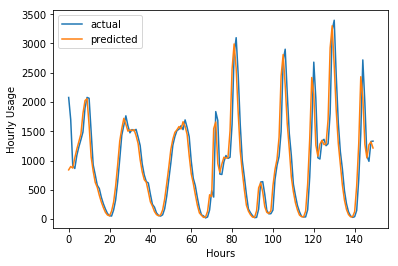

In [33]:
result =  ewma_my(array, 0.8, 202)
actual=[]
for i in range(200,350):
    actual.append(array[i])
plt.plot(actual, label = "actual")
plt.plot(result, label = "predicted")
plt.xlabel("Hours")
plt.ylabel("Hourly Usage")
#actual = data[576:].values
sump = 0
for i in range(len(result)):
    sump+=abs((result[i]-actual[i])/actual[i])
print ("Average error: ",str(100*sump/len(result)))
plt.legend()
plt.show()

840
Average error:  35.6065757749


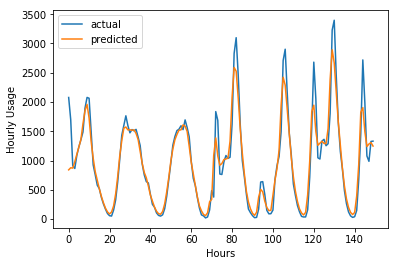

In [31]:
result =  ewma_my(array, 0.5, 202)

actual=[]
for i in range(200,350):
    actual.append(array[i])
plt.plot(actual, label = "actual")
plt.plot(result, label = "predicted")
plt.xlabel("Hours")
plt.ylabel("Hourly Usage")
#actual = data[576:].values
sum = 0
for i in range(len(result)):
    sum+=abs((result[i]-actual[i])/actual[i])
print "Average error: ",str(100*sum/len(result))
plt.legend()
plt.show()